In [1]:
import tensorflow as tf 
import keras
import pandas as pd 
import numpy as np 
from sklearn.datasets import make_moons 
import matplotlib.pyplot as plt 
import seaborn as sns 
from keras.utils import plot_model
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score 
from sklearn.compose import make_column_transformer

In [2]:
X, y = make_moons(n_samples=1000, noise=0.15, random_state=42)

In [3]:
X[0], y[0]

(array([-0.08156811,  0.48221119]), 1)

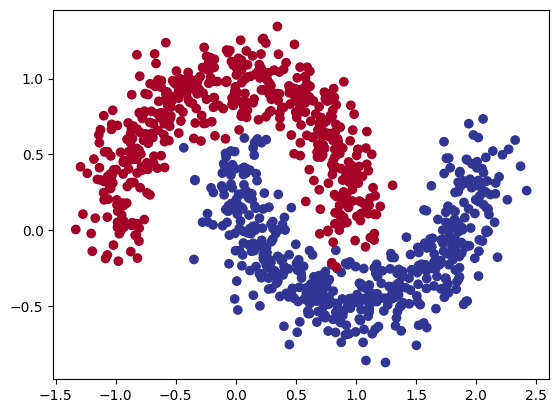

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [5]:
# Create train & test split and normalize data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

col_transformer = make_column_transformer(
    (MinMaxScaler(), [0, 1]),
    remainder='passthrough'
)

col_transformer.fit(X_train)
X_train_norm = col_transformer.transform(X_train) 
X_test_norm = col_transformer.transform(X_test)

X_train_norm[:5], X_test_norm[:5]

(array([[0.92514302, 0.5374986 ],
        [0.05332143, 0.57725618],
        [0.31166946, 0.90180502],
        [0.33923329, 0.83768285],
        [0.46496819, 0.30356668]]),
 array([[0.52019622, 0.19429114],
        [0.63449933, 0.63170141],
        [0.72259114, 0.21234944],
        [0.57985114, 0.81406146],
        [0.83221369, 0.24591276]]))

In [6]:
# model-1  

model_1 = keras.Sequential([
    keras.layers.Dense(50, activation='relu'), 
    keras.layers.Dense(1, activation='sigmoid')
], name="Model_1")

model_1.compile(
    loss=keras.losses.BinaryCrossentropy(),  
    optimizer=keras.optimizers.Adam(), 
    metrics=['accuracy']
)

model_1.fit(
    X_train_norm, 
    y_train, 
    epochs=100, 
    verbose=0
)

In [7]:
y_pred_1 = model_1.predict(X_test_norm)
y_pred_1[:5]

y_pred_1_act = np.round(np.squeeze(y_pred_1))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [8]:
model_1.evaluate(X_test_norm, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8647 - loss: 0.2483


[0.2627005875110626, 0.8550000190734863]

In [9]:
# model_2

keras.utils.set_random_seed(42)

model_2 = keras.Sequential(name="Model_2")
model_2.add(keras.layers.Dense(50, activation='relu'))
model_2.add(keras.layers.Dense(50, activation='relu'))
model_2.add(keras.layers.Dense(1, activation="sigmoid"))

model_2.compile(
    loss=keras.losses.BinaryCrossentropy(), 
    optimizer=keras.optimizers.Adam(), 
    metrics=['accuracy']
) 

lr_scheaduler = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))  

history = model_2.fit(
    X_train_norm, 
    y_train,
    epochs=100, 
    verbose=0, 
    validation_data=(X_test_norm, y_test),
    callbacks=[lr_scheaduler]
)

In [10]:
def plot_learning_rate_vs_loss(history):
    lrs = 1e-4 * (10**(tf.range(100)/20))
    plt.figure(figsize=(10, 7)) 
    plt.semilogx(lrs, history.history['loss'])
    plt.xlabel("Learning Rate") 
    plt.ylabel("Loss") 
    plt.title("Learning Rate vs Loss");

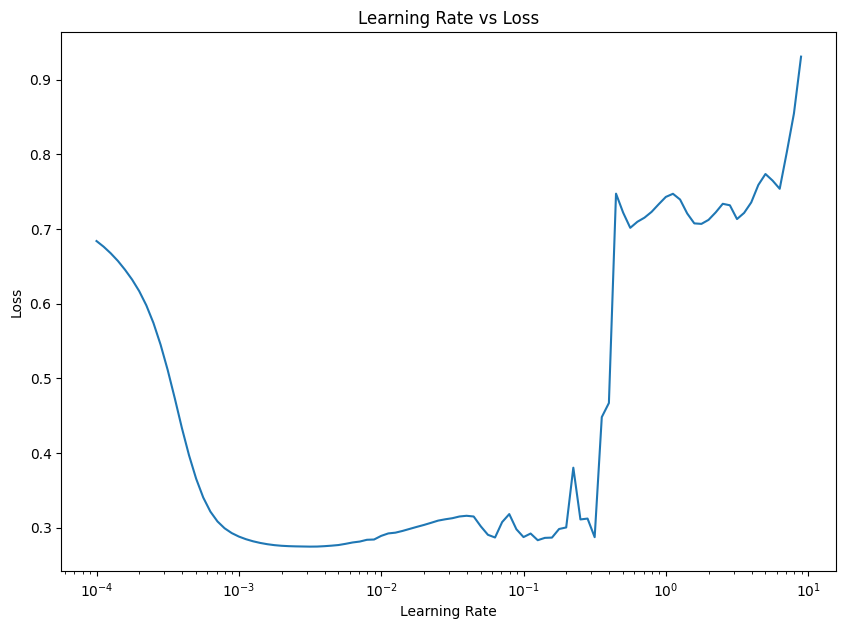

In [11]:
plot_learning_rate_vs_loss(history=history)

In [12]:
model_2.evaluate(X_test_norm, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5093 - loss: 0.8725 


[0.8843451142311096, 0.5]

In [13]:
model_1.evaluate(X_test_norm, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8647 - loss: 0.2483 


[0.2627005875110626, 0.8550000190734863]

In [14]:
y_pred_2 = model_2.predict(X_test_norm) 
y_pred_2_act = np.round(np.squeeze(y_pred_2))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


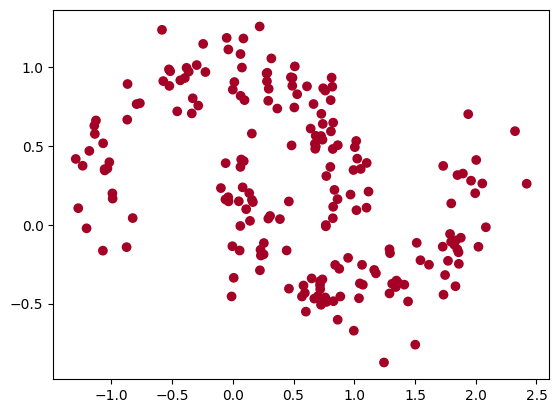

In [15]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_2_act, cmap=plt.cm.RdYlBu)

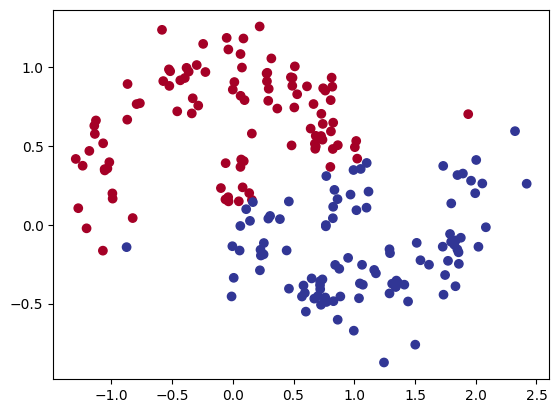

In [16]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_1_act, cmap=plt.cm.RdYlBu)

In [20]:
# model_3 

keras.utils.set_random_seed(42)

model_3 = keras.Sequential([
    keras.layers.Dense(100, activation='relu'), 
    keras.layers.Dense(100, activation='relu'), 
    keras.layers.Dense(1, activation='sigmoid')
], name="Model_3") 

model_3.compile(
    loss=keras.losses.BinaryCrossentropy(), 
    optimizer=keras.optimizers.Adam(learning_rate=0.001), 
    metrics=['accuracy']
) 

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        patience=7, 
        restore_best_weights=True
    ), 
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss', 
        patience=7, 
        restore_best_weights=True
    )
] 

model_3.fit(X_train_norm,
           y_train, 
           validation_data=(X_test_norm, y_test), 
            epochs=100, 
            callbacks=callbacks, 
            verbose=0 
           )

model_3.evaluate(X_test_norm, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9874 - loss: 0.0811 


[0.0891200453042984, 0.9750000238418579]

In [22]:
y_pred_3 = model_3.predict(X_test_norm) 
y_pred_3_act = np.round(np.squeeze(y_pred_3)) 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step


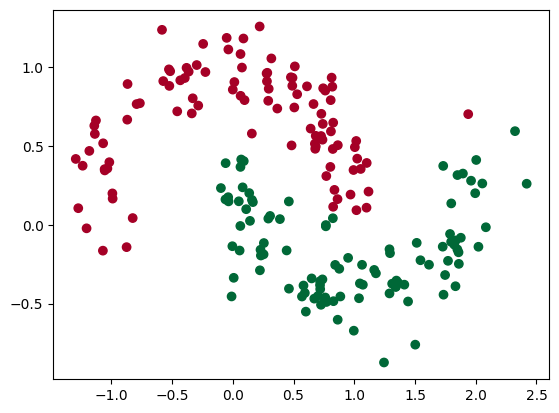

In [23]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_3_act, cmap=plt.cm.RdYlGn);